 In this notebook, I update the haem atlas annotations after I had subclustered the progenitor population 

1) I had more accurate annotations for the progenitors (5000 cells)
2) I had mislabelled some monocytes, plasmacytoid DC and NK cells as progenitors
3) I had forgotten to add the LMPP/ELP population in the progenitor atlas, will correct that 

SO I will have two new finalised anno columns 

1) Haem_Manual_Annotation_Level1_V6 : finer annotations latest version 
2) Haem_Manual_Annotation_Level0_V2 : broader annotations 

In [1]:
prog_panel=  {"HSC": ["HLF",'PTPRC',"CD34","MECOM","HOXA9","RUNX1","PRSS57","SPINK2","MLLT3",'HOPX',"CD33"],
    
              "GMP": ['CD34', 'SPINK2', 'AZU1', 'PRTN3','ELANE', 'MPO', 'LYZ'],
             'CMP': ['CD34', 'CTSG', 'PRTN3', 'SPINK2'],

              "CDP": ["CSF2RA","SIGLEC6"], # dendritic lineage 
              'ILC precursor': ['GATA3', 'KIT', 'RORC', 'ZBTB16'],
    'LMPP': ['BCL11A', 'CD34', 'IL2RG', 'IL7R', 'SPINK2'],
    'MEP': ['CD34', 'GATA1', 'GATA2', 'KLF1', 'PLEK'],
    'MEMP': ['CD34', 'CTNNBL1', 'GATA1', 'GATA2', 'TESPA1'],
             'ELP': ['FLT3', 'IL7R', 'LTB', 'RAG1']
            }
MP=['CD34', 'PRSS57', 'AZU1', 'CTSG', 'PRTN3']
MEMP= ['GATA1','GATA2','TESPA1', 'CTNNBL1','CD34']



fbm_prog = {
    'CMP': ['CD34', 'CTSG', 'PRTN3', 'SPINK2'],
    'DC precursor': ['CD1C', 'CD34', 'CLEC10A', 'IRF8'],
    'DC1': ['CADM1', 'CLEC9A', 'XCR1'],
    'DC2': ['CD1C', 'CLEC10A', 'FCER1A', 'HLA-DPB1'],
    'DC3': ['CD163', 'CD1C', 'CD36', 'CLEC10A', 'S100A8'],
    'ELP': ['FLT3', 'IL7R', 'LTB', 'RAG1'],
    'GMP': ['AZU1', 'CALR', 'CD34', 'PRSS57'],
    'HSC/MPP': ['CD34', 'HLF', 'MLLT3', 'PRSS57', 'SPINK2'],
    'ILC precursor': ['GATA3', 'KIT', 'RORC', 'ZBTB16'],
    'LMPP': ['BCL11A', 'CD34', 'IL2RG', 'IL7R', 'SPINK2'],
    'MEP': ['CD34', 'GATA1', 'GATA2', 'KLF1', 'PLEK'],
    'MEMP': ['CD34', 'CTNNBL1', 'GATA1', 'GATA2', 'TESPA1'],
    'MOP': ['IRF8', 'LYZ', 'PRTN3', 'S100A8'],
    'MPP myeloid': ['CD34', 'CSF1R', 'GATA2', 'MPO', 'SPINK2'],
    'NK progenitor': ['CD34', 'NKG7', 'PRSS57', 'SOX4', 'TOX'],
    'eo/baso/mast precursor': ['CD34', 'CSF2RB', 'HDC', 'SPINK2'],
    'myeloid DC progenitor': ['CD1C', 'CD34', 'CLEC10A', 'IRF8'],
    'pDC progenitor': ['CD34', 'GZMB', 'IRF8', 'JCHAIN']
}



b_markers_panfetal = {'lymphoid progenitor':['CD34','SPINK2','IL7R','KIT'],
           'PRE PRO B':['FLT3','CD19','VPREB1'], 
           'PRO B':['MME','CDC45','DHFR','MKI67'], 
           'LATE PRO B':['CD27','RAG1','DNTT','VPREB3'], 
           'PRO -> PRE':['CD24','TNFRSF17'], 
           'PRE -> IMMATURE':['MME','IDH2','SPIB','IL4R','IGHM'], 
           'MATURE':['IGHD','MS4A1','CD40','FCER2'], 
           'B1':['CD27','SPN','CCR10'],
           'PLASMA B':['JCHAIN','SDC1','CD38'],
           'CYCLING_B':['MKI67']
          }

 # myeloid marker genes- panfetal 

myeloid_markers_panfetal = {'Early Progenitor':["CD34",	"SPINK2",	"MLLT3"],
'Myeloid_progenitor':["PRSS57",	"PRTN3",	"AZU1",],
'Neutrophil lineage':["ELANE",	"DEFA4",	"LCN2",	"LTF",	"ORM1",],
'Monocyte_lineage':["CD52",	"S100A8",	"MS4A6A",	"CD14",	"CXCR4",	"CCR2",	"IL1B",	"CD300E",],
'DC_progenitor':["ACY3",	"TIFAB",	"KIF17",],
'pDC':["CLEC4C",	"JCHAIN",	"IRF7",],
'ASDC':["SIGLEC6",	"AXL",],
'DC2':["CLEC10A",	"CD1C",],
'DC1':["CLEC9A",	"BATF3",],
'MIGRATORY_DC':["CCR7",	"LAMP3",],
'LANGERHANS_CELLS':["IDO1","CD207",	"CD1A",],
'EO_BASO_MAST':["CLC",	"KIT",	"TPSAB1",],
'MAC_LYVE1_HIGH':["F13A1",	"LYVE1",	"SPP1"],
 'MAC_IRON_RECYCLING':["CD5L",	"APOE",	"VCAM1",],
 'MAC_PROLIFERATING':["TOP2A",	"MKI67",],
 'MAC_MHCII_HIGH':["HLA-DRA",	"HLA-DPA1",	"CLEC7A",],
 'MAC_KUPFFER_LIKE':["ENG",	"KDR",	"CAV1",],
#'MAC_PERI':["SPP1","OLFML3","CCL3"],
#'MAC_ERY':['HBA1','HBA2','HBG2'],
 'MAC_TREM2':["TREM2",	"P2RY12",],
    'MAC_TLF+':["TIMD4", "FOLR2", 'LYVE1'],
'OSTEOCLAST':["MMP9",	"ACP5",]
          }


# Mega- ERY markers 

MEGA_ERY_markers_panfetal = {"Megakaryocyte Erythroid Precursors":['TESPA1','GATA2','FCER1A'],
"Early_ERY":['KLF1','APOE','FAM178B'],
"Mid_ERY":[ 'BLVRB', 'CD36', 'OAT',],
"Late_ERY":[ 'GYPA', 'GYPB', 'SLC4A1'],
"YS_ERY" : ['HBZ','HBE1'],
"Early_MK":['HBD','PF4'],
"late_MK":['ITGA2B','ITGB3','CLK1'],
"VSMC_PERICYTE_III":['PDGFRA', 'TAGLN','RGS5'],
'MACROPHAGE_ERY':["C1QA","CD163"],
"Proliferating" : ["TOP2A","MKI67"],
          }


# Progenitor Marker Genes 

progenitor_markers_panfetal = {'HSC_MPP':['CLEC9A','HLF','CD34','SPINK2'],
           'MLP':['BCL11A','IL7R','IL2RG'],
           'B lineage':['CD19','VPREB1','PAX5'],
           'T lineage':['CD3D','BCL11B'],
           'MEMP':['GATA2'],
           'MEP':['KLF1','ITGA2B'],
           'Ery lineage':['HBB','HBG1'],
           'Myeloid lineage':['MPO','CSF1R','CEBPA']
          }


# Stroma Annotations 

stroma_markers_panfetal = {'FIBROBLAST':['PDGFRA'],
           'SPLENIC FIBRO':['NKX2-5'],
           'MYOFIBROBLAST':['ACTA2'],
           'MYSENCHYMAL LYMPHOID TISSUE ORGANISER':['CCL19','CCL21','CXCL13'],
           'MUSCLE SATELLITE CELLS':['PAX7','MYOD1','MYF5'],
           'SKELETAL MUSCLE':['MYL1','ACTA1','TNNT3'],
           'SMOOTH MUSCLE':['MYH11','TAGLN','ACTA2','DES'],
           'MESOTHELIUM':['UPK3B','LRRN4'],
           'OSTEOBLAST':['IBSP','PHOSPHO1','IFITM5'],
           'CHONDROCYTE':['CSPG4','COL9A1','HAPLN1'],
           'GLIAL CELL':['SOX10','SOX2'],
           'NEURON':['TUBB2B','STMN4','ELAVL3'],
           'MELANOCYTE':['PMEL','TYR','TYRP1','MLANA'],
           'KERATINOCYTE':['KRT14','KRT5','GATA3'],
           'HEPATOCYTE':['APOA1','ALB','AFP'],
           'DEVELOPING NEPHRON':['PAX2'],
           'EPITHELIUM':['EPCAM','CDH1','KRT19'],
           'INTERSTITIAL CELLS OF CAJAL':['ETV1','KIT'],
           'ENTEROENDOCRINE CELL':['CHGA','NEUROD1','NEUROG3'],
           'ENDOTHELIUM':['CDH5','PECAM1','CD34'],
           #'TIP EC':['VIM','PODXL','IL32','KDR'],
           'VSMC/PERICYTE':['ACTA2','TAGLN','RGS5'],
           'PERIVASCULAR MACROPHAGE':['C1QA','RNASE1','LYVE1'],
           'CYCLING':['MKI67'],
           'ERY':['HBB'],
           'IMMUNE':['PTPRC']
          }

YolkSac_Markers={ "HSPCs&Prog.": ["CD34", "SPINK2", "PRSS57"],
                        
                        "Lymphoid": [ "CD7", "IL7R"],
                        
                        "ysDC": [ "LTBR", "CLEC10A", "CD1C"],
                        
                        "Monocyte":[ "LYZ","HLA-DRA", "FCGR3A"],
                        
                        "Macrophage": ["CD4","CD14","C1QA"],
                        
                        "TREM2 Mac.": ["TREM2","CX3CR1","P2RY12"],
                        
                        "Granulocyte pre.": ["MPO","CLC","GATA2"],
                        
                        "Mast Cell": ["TPSAB1", "KIT"],
                        
                        "MK": ["ITGA2B","ITGB3","CLEC1B"],
    
                        "Erythroid": ["GYPA","HBE1","HBZ", "HBG1"], 
                        
                        "Endothial(LYVE1+)": ["LYVE1","PECAM1","KDR","CD34"],
                        
                        "Endothelial(PVLAP+)": ["PLVAP","ESAM","IL33","CD34"],
                        
                        "Fibroblast": ["PDGFRA","THY1","VCAN", "LUM"],
    
                        "Smooth Muscle": [ "ACTA2","ITGA1","MCAM"],
                        
                        "Mesothelium": ["KRT19","PDPN","UPK3B"],
                        
                        "Endoderm": ["EPCAM","SPINK1","ASGR1","HNF4A"] }  
fetal_liver= { "HSC/MPP.": ["HLA-DRA", "CD34", "SPINK2"], 
              "Pre pro-B cell": ["IGLL1","CD79B"],
              "pro-B cell": ["TCL1A","IGKC","MS4A1","CD19"],
              "pre-B cell/B": ["LTB"], 
              "ILC pre.":["LTB","KLRB1","CD3E","PTPRC","CD7","IL32"],
              "Early L/TL": ["CD8A"],
              "NK": ["KLRD1","NKG7","XCL2","NCAM1"],
              "Neut-my pro.": ["MPO","PLAC8","LYZ"], 
              "pDC pre.": ["IL3RA",'CLEC9A'],# PLAC8 is not specific 
              "DC pre.": ["S100A9",'CD1C'],
              "DC1": ['CLEC9A'], 
              "DC2" : ["CD1C"], 
              "Mono pre.": ['S100A9'], 
              "Monocyte": ['CCL4','CD14'], 
              "Mono-mac": ['FCGR3A','CD4','C1QA'], 
              "Kuppfer cell" : ['VCAM1'], 
              "VCAM1+ EI mac": ['GYPA'], 
              "MEMP": ['SERPINB1'], 
              "Mast": ['TPSAB1','KIT'],
              "MK": ['PF4','ITGA2B'], 
              "Early ERY": ['GATA1','KLF1'], 
              "Mid ERY": ['ALAS2','HBA1'], 
              "Late ERY": ['BPGM'], 
              "Endo": ['ESAM'], 
              "Fibro":['ECM1'], 
              "Hepatocyte": ['APOA1']
              

}

fbm_major_celltypes= {
"ERY/MK":["PTPRC",'EPCAM','GYPA','GYPB','ITGB3'],
 
 "EC": ['CDH5','KDR','ANPEP'], 
    
"Gran/mast/DC": ["MSR1","KIT", 'IL3RA','IL5RA','HLA-DRA','HAVCR2','CLEC9A'], 
    
    "Monocytes": ["CD1C",'CLEC4C','CD14','CD52','CD34','CD96'], 
    "Neurtrophil": ["ITGB2",'SELL','ITGAM'], 
    
    "B lineage": ["CEACAM8",'CD99','CD79A','MME','MS4A1','TNFRSF13C'],
    "CD4T/CD56 NK": ['CD3E','KLRB1']
 
}


celltypist_lymphoid= {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019
    
    "ILC_precursor": ["LST1","HPN","SCN1B"],
    "NK": ['GNLY','NKG7','XCL2'],
    "CD16+ NK": ["FCGR3A","GNLY","NKG7"],
     "CD16- NK": ["CD160","GNLY","NKG7"],
    'Trans. NK': ["CCL5","GZMK",'FCGR3A'],
    "ILC": ["S100A13",'TLE1','AREG'],
    'ILC1': ['CXCR3','CD3D','IKZF3'],
    'ILC2': ['GATA3','KLRG1','HPGDS'], 
    'ILC3': ['IL4I1','RORC','KIT'],

    


}


celltypist_progenitors=  {
    "ELP": ["RUNX2", "FLT3","LTB"], # HCA Immune 2018
    'Early lymphoid/T lymphoid': ['ETS1','IL32','GATA3'], # Popescu et al. 2019

    "HSC": ["CD34","SPINK2","CRHBP"],
    "CMP": ["MPO","CTSG","FLT3"],
    "GMP": ["ELANE","MPO","PRTN3"],
    "MEMP": ["GATA1","GATA2","ITGA2B","FCER1A"], # FCER1A, GATA1 and GATA2 liver 
    "Neut_myeloid_pro.":["SERPINB1","MPO","LYZ"]}

celltypist_immune= {
    
    "MNP": ["HLA_DPA1","HLA-DQA1",'FGL2'],
    "Mast": ["TPSAB1","TPSB2",'CPA3']

}



cell_typist_B={"B": ["CD79A","MS4A1","CD19"],
               "transitional": ["CD24","MYO1C","MS4A1"],
              "large_pre_B":["CD24","MME","MKI67"],
              "pre_pro_B":["ZCCHC7","IL7R","RAG1"],
               "pro-b":["MME","DNTT",'IGLL1'],
                "small_pre_B":["IGLL5",'CD24',"MME"],
               "cycling_B":['CD19',"TOP2A","MKI67"]
              }


dc_gene_sets= {
    'pan_DC': ['HLA-DRA', 'FLT3',"KIT", "CSF2RA", "FLT3", "IL3RA"],
 'CDP': ['HLA-DRA', 'IL3RA', 'CD34'],
 'pre-DC (bulk)': ['HLA-DRA',
  'IL3RA',
  'CD33',
  'PTPRC',
  'CD2',
  'CD5',
  'SIGLEC6',
  'CX3CR1',
  'CLEC4C',
  'NRP1'],
 'early pre-DC': ['IL3RA', 'KIT', 'CD5', 'NRP1', 'SIGLEC6', 'TLR9', "CSF2RA", "FLT3", "IL3RA"],
 'pre-cDC1': ['CADM1', 'THBD', 'CLEC9A', 'IRF8'],
 'pre-cDC2': ['CD1C', 'FCER1A', 'BTLA', 'SLAMF7', 'IRF4'],
 'pDC': ['IL3RA', 'CLEC4C', 'NRP1', 'TCF4', 'PACSIN1', 'IRF7', 'TLR7', 'CD68'],
 'cDC1 (mature)': ['CLEC9A', 'CADM1', 'THBD'],
 'cDC2 (mature)': ['CD1C', 'ITGAX', 'FCER1A'],
'plasmadc_vs_predc_genes': [ 
    # Distinguish pre-DC from plasmacytoid DC genes 
    "CD33",   # CD33
    "CX3CR1",    # CX3CR1
    "CD2",       # CD2
    "CD5",       # CD5
    "SIGLEC6"    # CD327
]}

HSC_scorecared={
    "HSC_Signature": ["RUNX1", "MLLT3","HOXA9","MECOM","HLF","SPINK2"],
    "HSC_Enriched": ["MYB","GFI1","STAT5A",'ZBTB16','HOPX','GATA2',
                     'GBP4','ITGA2B','KCNK17','SVOPL','C2orf88','SELP',
                     'CD82','ITGA4','GP9','TMEM163','RAB27B','SMIM24',
                     'GMPR','PDLIM1','ALDH1A1','NRGN','CCDC173','CXCL3',
                     'CYTL1','PRSS57','ANGPT1'],
    'HSC_shared_Endo': ["CD34","PECAM1",'CDH5','ECSCR','CALCRL',
                       'PROCR','ESAM','TIE1','EMCN'],
     "HSC_Immature": ['CDH5', 'MEIS2', 'IGFBP2', 'HOXB9'],
     "HSC_Mature": ['PROM1', 'HLA-DRA', 'HEMGN', 'MSI2'] 
}

In [2]:
import scanpy as sc 
adata= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/bone_haem_atlas_FINAL_OBJECT_V3_FULL_GENES.h5ad')

In [3]:
import pandas as pd
pd.set_option('display.max_rows', 500)


In [4]:
# prog has the high confidence 5000 prog cells and prog_all has the non-prog cells as well

In [5]:
prog= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/progenitor/prog_v2/Bone_Haem_Atlas_Progenitor_Integrated_FULLGENES_remove_low_conf.scvi_integrated_fullgenes.h5ad')

In [6]:
prog.obs['Prog_Only_Anno_Level1_V3']= prog.obs['Prog_Only_Anno_Level1_V3'].astype(str)
prog.obs.loc[prog.obs['leiden_res_3'] == '6', 'Prog_Only_Anno_Level1_V3'] = 'NK'


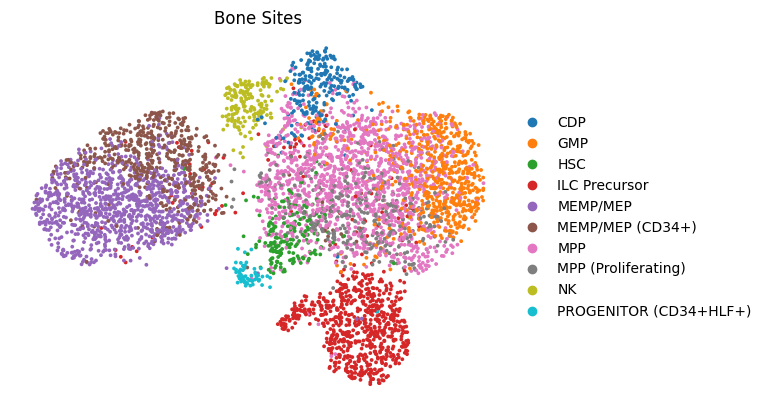

In [7]:
sc.pl.umap(
    prog,
    color="Prog_Only_Anno_Level1_V3",
    size=30,
    legend_loc="right margin",
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [8]:
prog_all= sc.read_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/Bone_Haem_Atlas_Progenitor_Integrated_FULLGENES_tmp.h5ad')

In [9]:
prog_all

AnnData object with n_obs × n_vars = 10554 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels', 'over_clustering', 'majority_voting', 'predicted_labels_Level1', 'predicted_labels_Level2', 'majority_voting_Level1', 'majority_voting_Level2', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predicted_doublets_unfiltered', 'scrublet_cluster_score_unfiltered', 'bh_pval_unfi

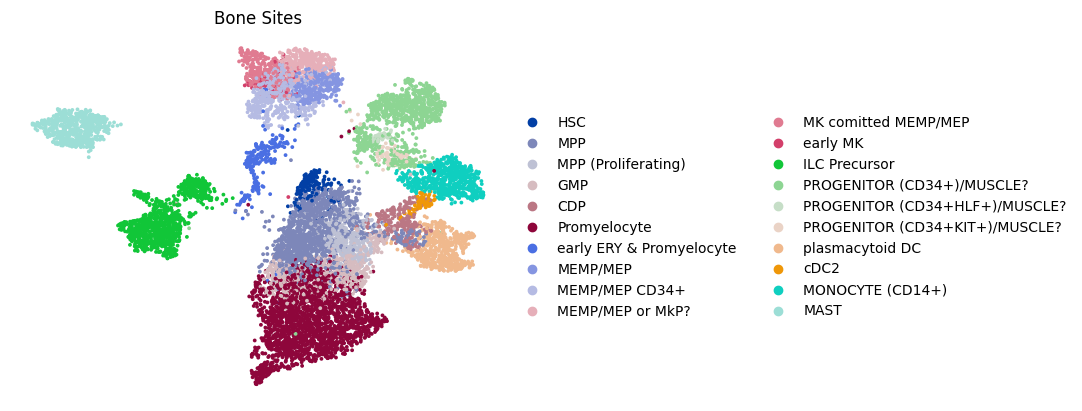

In [10]:
sc.pl.umap(
    prog_all,
    color="Prog_Only_Anno_Level1",
    size=30,
    legend_loc="right margin",
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [12]:
list(adata.obs['Haem_Manual_Annotation_Level1_V4'].unique())

['ERY',
 'MACROPHAGE',
 'MK',
 'PROGENITOR',
 'DC',
 'MAST',
 'MONOCYTE',
 'PROMYELOCYTE',
 'EO/BASO',
 'NEUTROPHIL',
 'B LINEAGE',
 'NK',
 'T CELL',
 'MYELOCYTE']

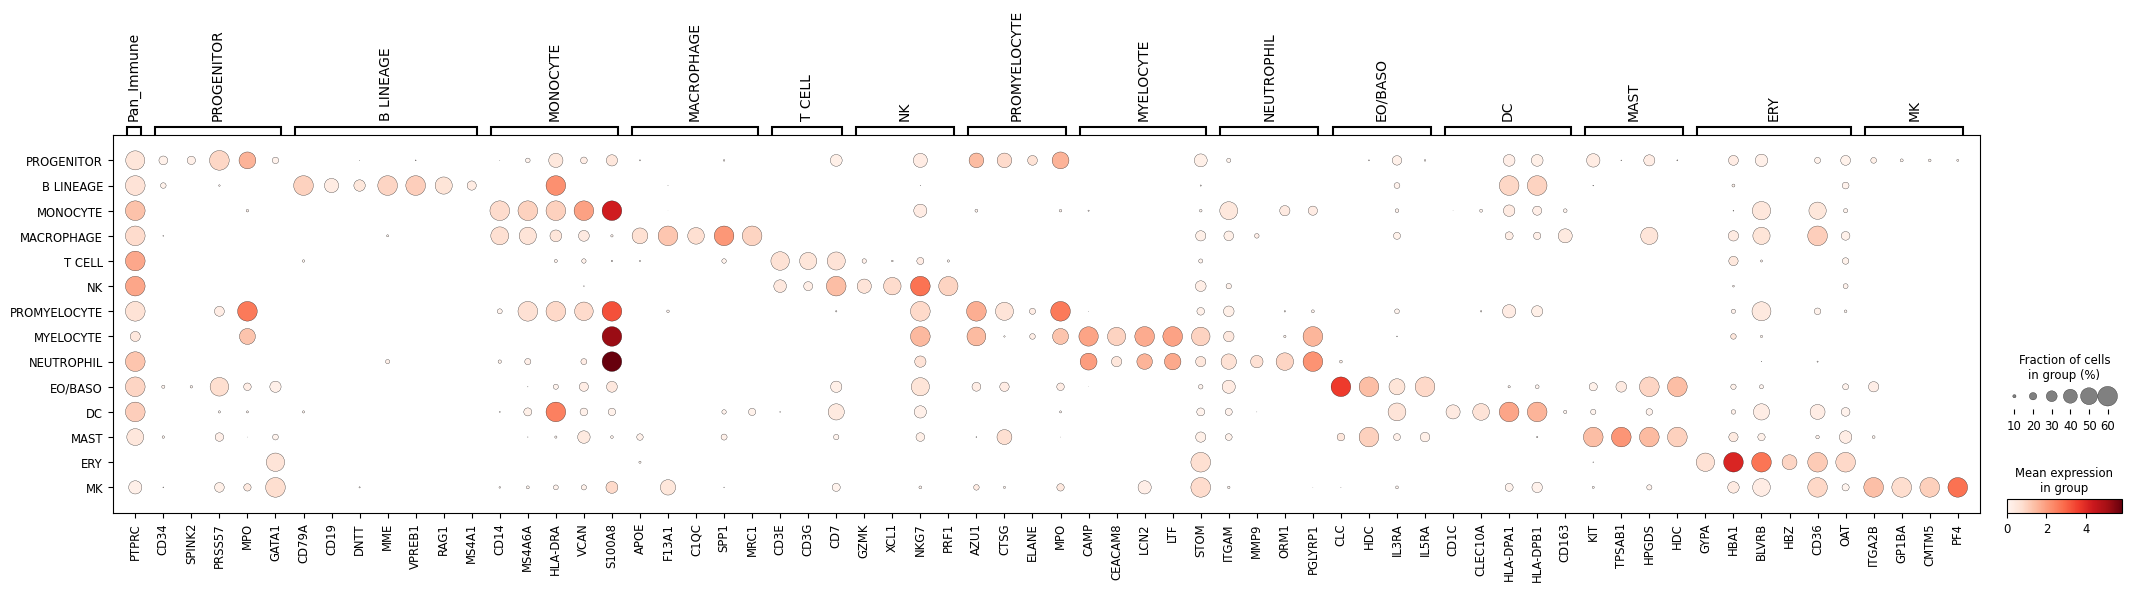

In [13]:
panel={     'Pan_Immune': 'PTPRC',
            'PROGENITOR': ['CD34', 'SPINK2', 'PRSS57', 'MPO', 'GATA1'],
           'B LINEAGE': ['CD79A', 'CD19', 'DNTT', 'MME', 'VPREB1', 'RAG1', 'MS4A1'],
           'MONOCYTE': ['CD14', 'MS4A6A',  'HLA-DRA',"VCAN",'S100A8'],
            'MACROPHAGE': ['APOE', 'F13A1', 'C1QC', 'SPP1',"MRC1"],
            'T CELL': ['CD3E', 'CD3G', 'CD7'],
           'NK': ['GZMK', 'XCL1', 'NKG7', 'PRF1'],
             'PROMYELOCYTE': ['AZU1', 'CTSG', 'ELANE', 'MPO',],
              'MYELOCYTE': ['CAMP', 'CEACAM8', 'LCN2', 'LTF', 'STOM'],
             'NEUTROPHIL': ['ITGAM', 'MMP9', 'ORM1', 'PGLYRP1'],
             "EO/BASO": ['CLC', 'HDC', 'IL3RA', 'IL5RA'],
                    "DC": ['CD1C','CLEC10A', "HLA-DPA1",'HLA-DPB1','CD163'], 

         'MAST': ['KIT', 'TPSAB1', 'HPGDS', 'HDC'],
       'ERY': ['GYPA', 'HBA1', 'BLVRB', 'HBZ',"CD36","OAT"],
       'MK': ['ITGA2B', 'GP1BA', 'CMTM5', 'PF4'],
}



sc.pl.dotplot(
    adata,
    var_names=panel,
    groupby="Haem_Manual_Annotation_Level1_V4",
    dot_min=0.05, dot_max=0.6,
    swap_axes=False,
    save="_markers_broad.png"
)


In [14]:
import pandas as pd 

In [15]:
adata.obs['Haem_Manual_Annotation_Level1_V6']=adata.obs['Haem_Manual_Annotation_Level1_V5'].copy()

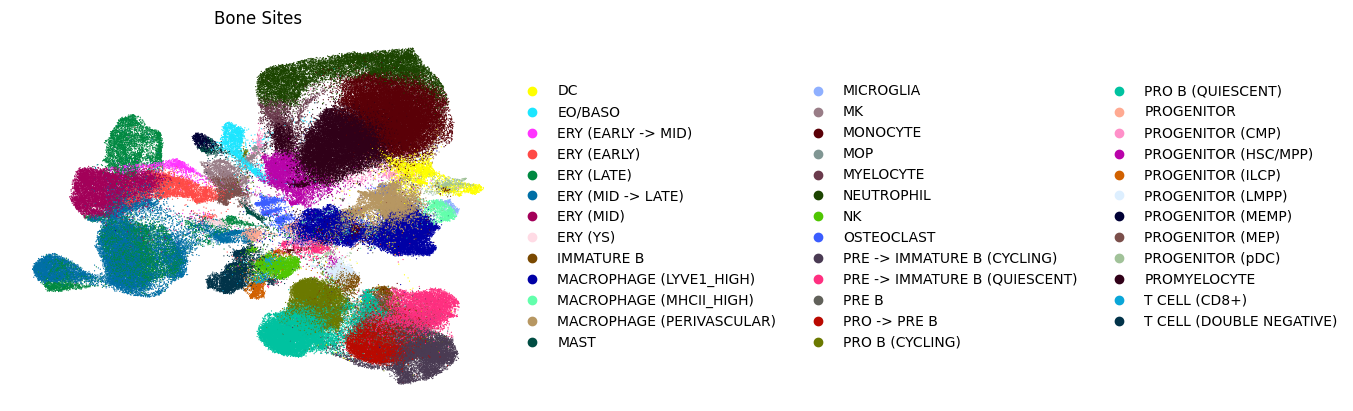

In [16]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V6",
    size=3,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [17]:
prog_all.obs['Prog_Only_Anno_Level1']=prog_all.obs['Prog_Only_Anno_Level1'].astype(str)

In [18]:
prog_all

AnnData object with n_obs × n_vars = 10554 × 36601
    obs: 'barcode_raw', 'Sanger_ID', 'Cell_ID', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'log1p_total_counts_rb', 'pct_counts_rb', 'total_counts_outlier', 'gene_counts_outlier', 'mt_outlier', 'Organ', '10X_Chemistry', 'Accession_ID', 'Age', 'Age(PCW)', 'Dataset', 'Donor_ID', 'FACS_Sorting', 'Anatomical_Site', 'Method', 'Multiplexed', 'Expected_Donors', 'Organism', 'Run_ID', 'Study', 'Technology', 'predicted_labels', 'over_clustering', 'majority_voting', 'predicted_labels_Level1', 'predicted_labels_Level2', 'majority_voting_Level1', 'majority_voting_Level2', 'mt_high_outlier', 'QC', 'scrublet_score_unfiltered', 'predicted_doublets_unfiltered', 'scrublet_cluster_score_unfiltered', 'bh_pval_unfi

In [19]:
prog.obs['Prog_Only_Anno_Level1_V3']=prog.obs['Prog_Only_Anno_Level1_V3'].astype(str)

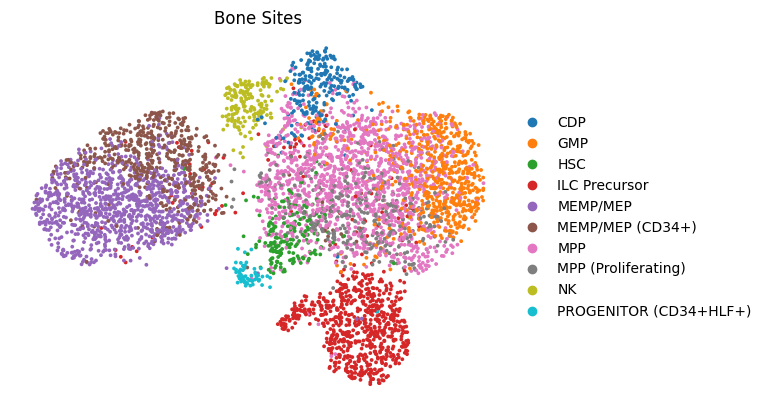

In [20]:
sc.pl.umap(
    prog,
    color="Prog_Only_Anno_Level1_V3",
    size=30,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [21]:
# Find overlapping cell IDs
common_cells = adata.obs_names.intersection(prog.obs_names)
adata.obs['Haem_Manual_Annotation_Level1_V6']=adata.obs['Haem_Manual_Annotation_Level1_V6'].astype(str)
# Transfer annotation
adata.obs.loc[common_cells, 'Haem_Manual_Annotation_Level1_V6'] = (
    prog.obs.loc[common_cells, 'Prog_Only_Anno_Level1_V3'].values
)


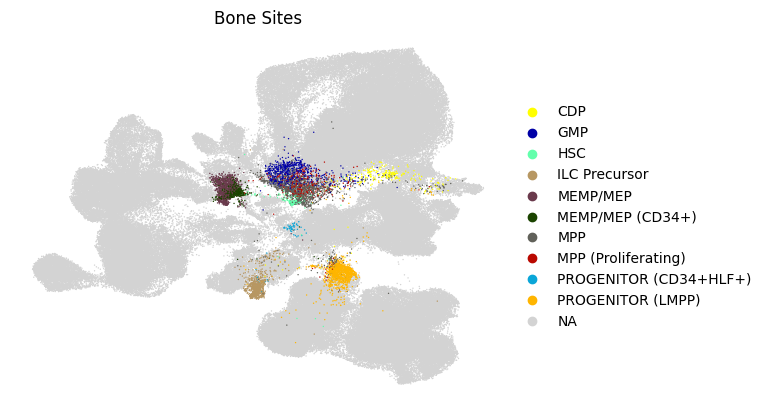

In [22]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V6",
    size=4,
    legend_loc="right margin",
    groups=["MPP","GMP",'ILC Precursor',"HSC",'MPP (Proliferating)','MEMP/MEP (CD34+)',
           'MEMP/MEP','CDP','PROGENITOR (CD34+HLF+)','PROGENITOR (LMPP)'],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [23]:
list(prog.obs['Prog_Only_Anno_Level1_V3'].unique())

['ILC Precursor',
 'PROGENITOR (CD34+HLF+)',
 'NK',
 'MPP',
 'MEMP/MEP',
 'CDP',
 'MEMP/MEP (CD34+)',
 'HSC',
 'GMP',
 'MPP (Proliferating)']

In [24]:
import pandas as pd
import numpy as np
prog_all.obs['Prog_Only_Anno_Level1']=prog_all.obs['Prog_Only_Anno_Level1'].astype(str)
src_col  = "Prog_Only_Anno_Level1"
tgt_col  = "Haem_Manual_Annotation_Level1_V6"

# 1) cells in prog_all but not in prog
diff_cells = np.setdiff1d(prog_all.obs_names.to_numpy(), prog.obs_names.to_numpy())

# 2) restrict to cells that exist in adata
common_cells = adata.obs_names.intersection(diff_cells)

# nothing to do?
if len(common_cells) == 0:
    print("No cells to update.")
else:
    # 3) values to transfer (aligned to common_cells order)
    new_vals = prog_all.obs.loc[common_cells, src_col].reindex(common_cells)

    # 4) ensure target column exists and can accept new categories
    if tgt_col not in adata.obs.columns:
        adata.obs[tgt_col] = pd.Series(index=adata.obs_names, dtype="object")

    # if categorical, add missing categories to avoid the "new category" error
    if pd.api.types.is_categorical_dtype(adata.obs[tgt_col]):
        cur_cats = list(adata.obs[tgt_col].cat.categories)
        add_cats = [c for c in new_vals.dropna().unique() if c not in cur_cats]
        if add_cats:
            adata.obs[tgt_col] = adata.obs[tgt_col].cat.add_categories(add_cats)

    # 5) assign
    adata.obs.loc[common_cells, tgt_col] = new_vals.values

    print(f"Updated {len(common_cells)} cells in '{tgt_col}' from '{src_col}'.")


Updated 5252 cells in 'Haem_Manual_Annotation_Level1_V6' from 'Prog_Only_Anno_Level1'.


/tmp/ipykernel_3654466/3094405594.py:25: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(adata.obs[tgt_col]):


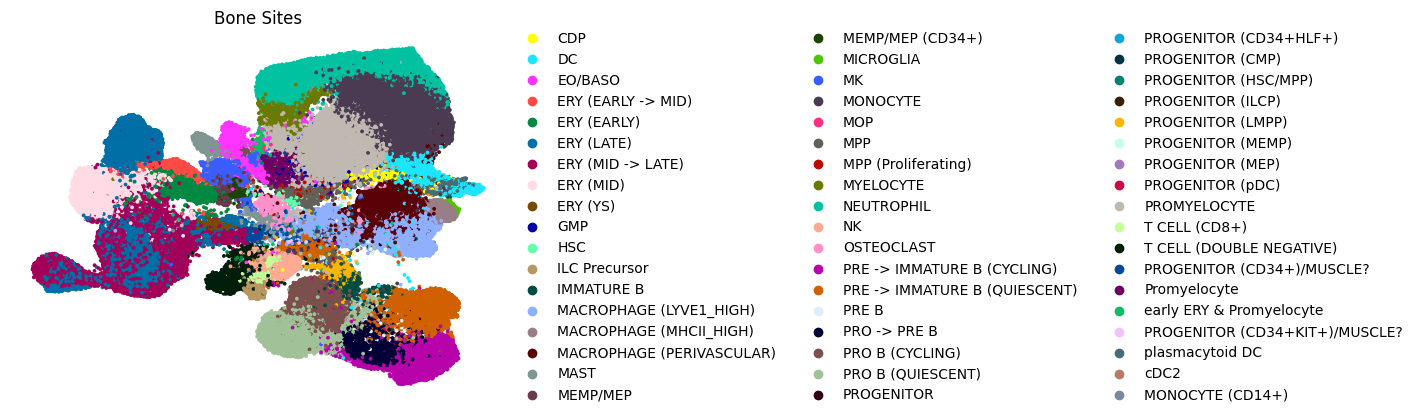

In [25]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V6",
    size=30,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [26]:
list(adata.obs['Haem_Manual_Annotation_Level1_V6'].unique())

['ERY (MID -> LATE)',
 'ERY (EARLY)',
 'MACROPHAGE (LYVE1_HIGH)',
 'MK',
 'ERY (YS)',
 'ILC Precursor',
 'ERY (MID)',
 'MACROPHAGE (PERIVASCULAR)',
 'DC',
 'ERY (EARLY -> MID)',
 'OSTEOCLAST',
 'MACROPHAGE (MHCII_HIGH)',
 'ERY (LATE)',
 'PROGENITOR (CD34+)/MUSCLE?',
 'MAST',
 'MONOCYTE',
 'PROGENITOR (CD34+HLF+)',
 'PROMYELOCYTE',
 'NK',
 'Promyelocyte',
 'EO/BASO',
 'NEUTROPHIL',
 'PROGENITOR (LMPP)',
 'early ERY & Promyelocyte',
 'PRO B (CYCLING)',
 'PRO B (QUIESCENT)',
 'T CELL (DOUBLE NEGATIVE)',
 'MPP',
 'PRE -> IMMATURE B (QUIESCENT)',
 'IMMATURE B',
 'PRE -> IMMATURE B (CYCLING)',
 'MICROGLIA',
 'MYELOCYTE',
 'MEMP/MEP',
 'PRE B',
 'PRO -> PRE B',
 'PROGENITOR (CD34+KIT+)/MUSCLE?',
 'CDP',
 'MEMP/MEP (CD34+)',
 'plasmacytoid DC',
 'HSC',
 'cDC2',
 'MONOCYTE (CD14+)',
 'GMP',
 'MPP (Proliferating)',
 'T CELL (CD8+)',
 'MOP']

In [27]:
adata.obs['Haem_Manual_Annotation_Level1_V6']=adata.obs['Haem_Manual_Annotation_Level1_V6'].astype(str)

In [28]:
adata.obs['Haem_Manual_Annotation_Level1_V6_OLD_Non_Harmonised']=adata.obs['Haem_Manual_Annotation_Level1_V6'].copy()

In [29]:
[
 'ILC Precursor' : PROGENITOR (ILCP),
 'DC',DC (CONVENTIONAL TYPE 2)
  'PROGENITOR (CD34+)/MUSCLE?', : PROGENITOR (CD34+)
  'Promyelocyte',PROMYELOCYTE
 'early ERY & Promyelocyte', PROMYELOCYTE
 'MPP',PROGENITOR (MPP)
 'MEMP/MEP', PROGENITOR (MEMP/MEP)
 'PROGENITOR (CD34+KIT+)/MUSCLE?', PROGENITOR (CD34+KIT+)
 'CDP',PROGENITOR (CDP)
 'MEMP/MEP (CD34+)',PROGENITOR (MEMP/MEP (CD34+))
 'plasmacytoid DC', DC (PLASMACYTOID)
 'HSC', PROGENITOR (HSC)
 'cDC2', DC (CONVENTIONAL TYPE 2)
 'MONOCYTE (CD14+)',MONOCYTE
 'GMP',PROGENITOR (GMP)
 'MPP (Proliferating)',PROGENITOR (MPP (PROLIFERATING))
 ]

SyntaxError: invalid syntax (221804878.py, line 2)

In [30]:
prog_all.obs['Prog_Only_Anno_Level1'].value_counts()

Prog_Only_Anno_Level1
Promyelocyte                      2255
MPP                               1354
ILC Precursor                      964
PROGENITOR (CD34+)/MUSCLE?         893
GMP                                648
MONOCYTE (CD14+)                   614
MAST                               567
plasmacytoid DC                    530
MEMP/MEP CD34+                     527
MPP (Proliferating)                367
MEMP/MEP                           325
MEMP/MEP or MkP?                   310
MK comitted MEMP/MEP               292
early ERY & Promyelocyte           243
CDP                                229
HSC                                185
cDC2                                79
PROGENITOR (CD34+KIT+)/MUSCLE?      71
early MK                            55
PROGENITOR (CD34+HLF+)/MUSCLE?      46
Name: count, dtype: int64

In [31]:
import pandas as pd

col = "Haem_Manual_Annotation_Level1_V6"

# mapping: old → new
rename_map = {
    "ILC Precursor": "PROGENITOR (ILCP)",
    "DC": "DC (CONVENTIONAL TYPE 2)",
    "PROGENITOR (CD34+)/MUSCLE?": "PROGENITOR (CD34+)",
    "Promyelocyte": "PROMYELOCYTE",
    "early ERY & Promyelocyte": "PROMYELOCYTE",
    "MPP": "PROGENITOR (MPP)",
    "MEMP/MEP": "PROGENITOR (MEMP/MEP)",
    "PROGENITOR (CD34+KIT+)/MUSCLE?": "PROGENITOR (CD34+KIT+)",
    "CDP": "PROGENITOR (CDP)",
    "MEMP/MEP (CD34+)": "PROGENITOR (MEMP/MEP (CD34+))",
    "plasmacytoid DC": "DC (PLASMACYTOID)",
    "HSC": "PROGENITOR (HSC)",
    "cDC2": "DC (CONVENTIONAL TYPE 2)",
    "MONOCYTE (CD14+)": "MONOCYTE",
    "GMP": "PROGENITOR (GMP)",
    "MPP (Proliferating)": "PROGENITOR (MPP (PROLIFERATING))",
}

# Work in object dtype to avoid categorical setitem errors
s_old = adata.obs[col].astype("object")
s_new = s_old.replace(rename_map)

# Assign back; keep as categorical (optional) with sorted unique categories
adata.obs[col] = pd.Categorical(s_new, categories=sorted(pd.unique(s_new)), ordered=False)

# Quick sanity check: show changed counts
changed = [k for k in rename_map if (s_old == k).any()]
print("Remapped labels (old → new):")
for k in changed:
    print(f"- {k} → {rename_map[k]} (n={int((s_old==k).sum())})")


Remapped labels (old → new):
- ILC Precursor → PROGENITOR (ILCP) (n=774)
- DC → DC (CONVENTIONAL TYPE 2) (n=2780)
- PROGENITOR (CD34+)/MUSCLE? → PROGENITOR (CD34+) (n=893)
- Promyelocyte → PROMYELOCYTE (n=2255)
- early ERY & Promyelocyte → PROMYELOCYTE (n=243)
- MPP → PROGENITOR (MPP) (n=1357)
- MEMP/MEP → PROGENITOR (MEMP/MEP) (n=982)
- PROGENITOR (CD34+KIT+)/MUSCLE? → PROGENITOR (CD34+KIT+) (n=71)
- CDP → PROGENITOR (CDP) (n=229)
- MEMP/MEP (CD34+) → PROGENITOR (MEMP/MEP (CD34+)) (n=527)
- plasmacytoid DC → DC (PLASMACYTOID) (n=530)
- HSC → PROGENITOR (HSC) (n=185)
- cDC2 → DC (CONVENTIONAL TYPE 2) (n=79)
- MONOCYTE (CD14+) → MONOCYTE (n=614)
- GMP → PROGENITOR (GMP) (n=648)
- MPP (Proliferating) → PROGENITOR (MPP (PROLIFERATING)) (n=367)


In [32]:
list(adata.obs['Haem_Manual_Annotation_Level1_V6'].unique())

['ERY (MID -> LATE)',
 'ERY (EARLY)',
 'MACROPHAGE (LYVE1_HIGH)',
 'MK',
 'ERY (YS)',
 'PROGENITOR (ILCP)',
 'ERY (MID)',
 'MACROPHAGE (PERIVASCULAR)',
 'DC (CONVENTIONAL TYPE 2)',
 'ERY (EARLY -> MID)',
 'OSTEOCLAST',
 'MACROPHAGE (MHCII_HIGH)',
 'ERY (LATE)',
 'PROGENITOR (CD34+)',
 'MAST',
 'MONOCYTE',
 'PROGENITOR (CD34+HLF+)',
 'PROMYELOCYTE',
 'NK',
 'EO/BASO',
 'NEUTROPHIL',
 'PROGENITOR (LMPP)',
 'PRO B (CYCLING)',
 'PRO B (QUIESCENT)',
 'T CELL (DOUBLE NEGATIVE)',
 'PROGENITOR (MPP)',
 'PRE -> IMMATURE B (QUIESCENT)',
 'IMMATURE B',
 'PRE -> IMMATURE B (CYCLING)',
 'MICROGLIA',
 'MYELOCYTE',
 'PROGENITOR (MEMP/MEP)',
 'PRE B',
 'PRO -> PRE B',
 'PROGENITOR (CD34+KIT+)',
 'PROGENITOR (CDP)',
 'PROGENITOR (MEMP/MEP (CD34+))',
 'DC (PLASMACYTOID)',
 'PROGENITOR (HSC)',
 'PROGENITOR (GMP)',
 'PROGENITOR (MPP (PROLIFERATING))',
 'T CELL (CD8+)',
 'MOP']

In [33]:
list(adata.obs['Haem_Manual_Annotation_Level1_V4'].unique())

['ERY',
 'MACROPHAGE',
 'MK',
 'PROGENITOR',
 'DC',
 'MAST',
 'MONOCYTE',
 'PROMYELOCYTE',
 'EO/BASO',
 'NEUTROPHIL',
 'B LINEAGE',
 'NK',
 'T CELL',
 'MYELOCYTE']

In [34]:
LEVEL0_MAPPING= {
    'ERY (MID -> LATE)': 'ERY',
 'ERY (EARLY)': 'ERY',
    
 'MACROPHAGE (LYVE1_HIGH)': 'MACROPHAGE',
 'MK' : "MK",
 'ERY (YS)' : "ERY",
 'PROGENITOR (ILCP)' : 'PROGENITOR',
 'ERY (MID)' : "ERY",
 'MACROPHAGE (PERIVASCULAR)' : 'MACROPHAGE',
 'DC (CONVENTIONAL TYPE 2)' : 'DC',
 'ERY (EARLY -> MID)' : "ERY",
 'OSTEOCLAST' : "MACROPHAGE",
 'MACROPHAGE (MHCII_HIGH)': "MACROPHAGE",
 'ERY (LATE)' : 'ERY',
 'PROGENITOR (CD34+)' :'PROGENITOR (LOW_CONF)' ,
 'MAST' : "MAST",
 'MONOCYTE' :'MONOCYTE' ,
 'PROGENITOR (CD34+HLF+)' : 'PROGENITOR',
 'PROMYELOCYTE': 'PROMYELOCYTE',
 'NK': "NK",
 'EO/BASO' : "EO/BASO",
 'NEUTROPHIL' : 'NEUTROPHIL',
 'PROGENITOR (LMPP)' : 'PROGENITOR',
 'PRO B (CYCLING)': 'B LINEAGE',
 'PRO B (QUIESCENT)': 'B LINEAGE',
 'T CELL (DOUBLE NEGATIVE)': 'T CELL',
 'PROGENITOR (MPP)' : 'PROGENITOR',
 'PRE -> IMMATURE B (QUIESCENT)': 'B LINEAGE',
 'IMMATURE B' : 'B LINEAGE',
 'PRE -> IMMATURE B (CYCLING)': 'B LINEAGE',
 'MICROGLIA': 'MACROPHAGE',
 'MYELOCYTE': 'MYELOCYTE',
 'PROGENITOR (MEMP/MEP)': 'PROGENITOR',
 'PRE B': 'B LINEAGE',
 'PRO -> PRE B': 'B LINEAGE',
 'PROGENITOR (CD34+KIT+)' : 'PROGENITOR',
 'PROGENITOR (CDP)': 'PROGENITOR',
 'PROGENITOR (MEMP/MEP (CD34+))':'PROGENITOR',
 'DC (PLASMACYTOID)' : 'DC',
 'PROGENITOR (HSC)':'PROGENITOR' ,
 'PROGENITOR (GMP)': 'PROGENITOR',
 'PROGENITOR (MPP (PROLIFERATING))': 'PROGENITOR',
 'T CELL (CD8+)':'T CELL' }

In [35]:
adata.obs['Haem_Manual_Annotation_Level0_V2'] = (
    adata.obs['Haem_Manual_Annotation_Level1_V6']
    .map(LEVEL0_MAPPING)
    .fillna(adata.obs['Haem_Manual_Annotation_Level1_V6'])  # keep unmapped as-is
)

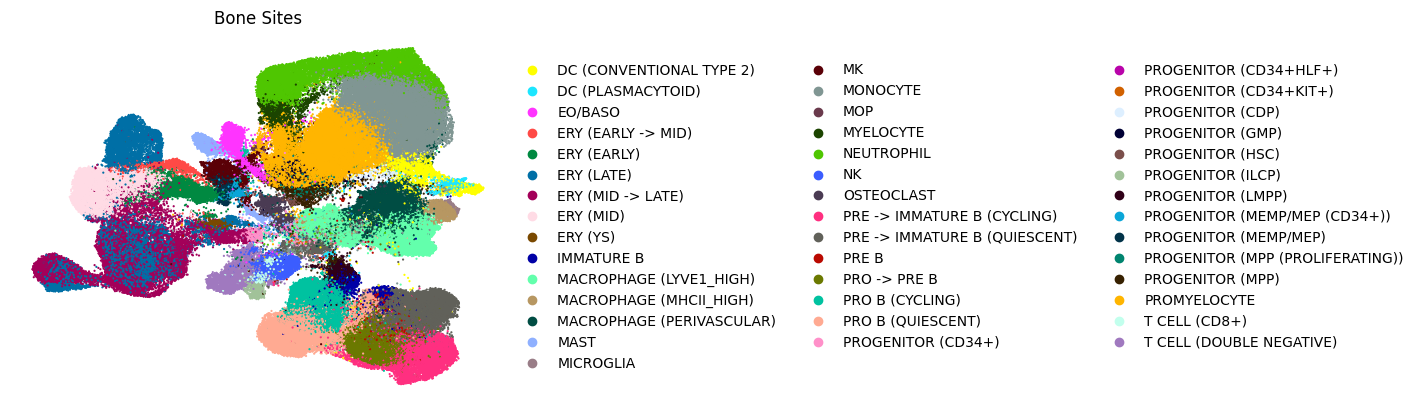

In [36]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level1_V6",
    size=10,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

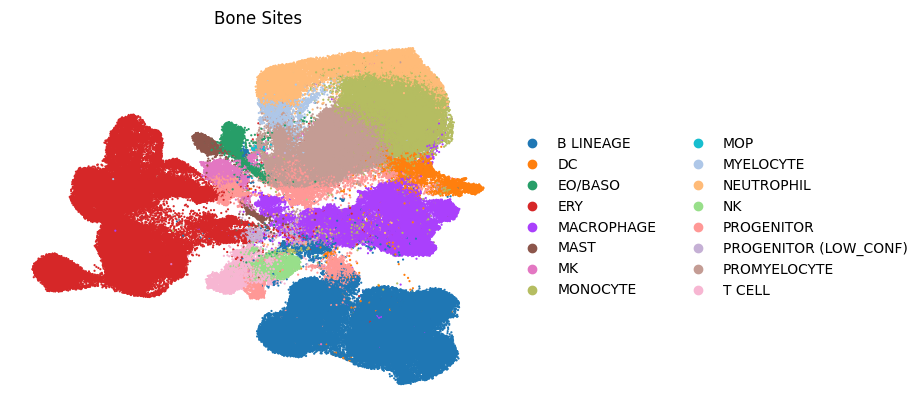

In [37]:
sc.pl.umap(
    adata,
    color="Haem_Manual_Annotation_Level0_V2",
    size=10,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [38]:
adata2=adata[adata.obs['Haem_Manual_Annotation_Level0_V2']!='PROGENITOR (LOW_CONF)']

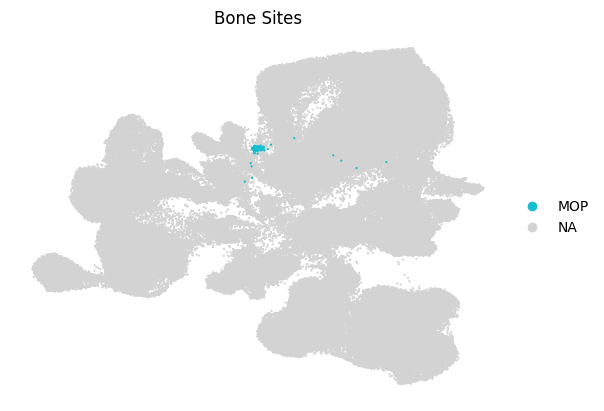

In [41]:
sc.pl.umap(
    adata2,
    color="Haem_Manual_Annotation_Level0_V2",
    size=10,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [40]:
adata.write_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_haem_compartment/bone_haem_atlas_FINAL_OBJECT_V3_FULL_GENES.h5ad')

In [46]:
prog_new= adata[adata.obs['Haem_Manual_Annotation_Level0_V2'].isin(["PROGENITOR"])].copy()
prog_expanded= adata[adata.obs['Haem_Manual_Annotation_Level0_V2'].isin(["PROGENITOR","PROMYELOCYTE","MYELOCYTE","MOP"])].copy()

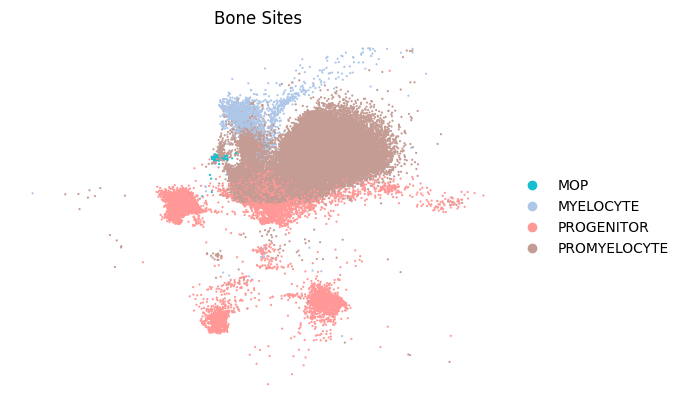

In [47]:
sc.pl.umap(
    prog_expanded,
    color="Haem_Manual_Annotation_Level0_V2",
    size=10,
    legend_loc="right margin",
    groups=[],
    frameon=False,
    title="Bone Sites",
    show=True,    # increase legend circle size
)

In [48]:
prog_new.write_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/progenitor/prog_v2/prog_v4_onlyhsc_mpp.h5ad')

In [ ]:
prog_expanded.write_h5ad('/nfs/team298/sm54/BoneAtlasProject/data/bone_atlas_anndatas_immune_subsets/progenitor/prog_v2/prog_v4_expanded.h5ad')